# Visualization for Plot 2

In the cells below, I take a data set that I thoroughly clenaed from an Amazon dataset provided to me by a professor at UCSD. The data from from the original raw files I received were connected based on matching asin numbers through SQL. From there, I continued to preform data wrangling to delete NaN's, ensure adequate data for calculations, create country-origin rows, take only unique brand instances, create development level rows and so forth. Once the data were thoroughly cleaned, I saved the new pandas dataframe as a CSV file which is imported here for the following visualizations. 

In [3]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read in the cleaned data from my previous work 
fullData_toRead = 'Electronics Data/fullData_electronics_develop.csv'
fullData = pd.read_csv(fullData_toRead)

In [6]:
# Take random sample of 5 data points
# I have connected reviews and products based on asin and created/cleaned columns
fullData.sample(5)

,asin,overall,unixReviewTime,reviewTime,price,brand,category,country_origin,developed
60667,B000EUFJXE,5,1351814400,"11 2, 2012",7.40,Maxell,electronics,usa,1
411445,B008EQ1YWA,5,1356566400,"12 27, 2012",279.95,Beats,electronics,usa,1
346375,B003JZ2JZ2,5,1363219200,"03 14, 2013",13.06,JVC,electronics,japan,1
169704,B0056VP0KS,5,1353196800,"11 18, 2012",85.99,Linksys,electronics,usa,1
236489,B002RL875A,5,1284595200,"09 16, 2010",399.99,Logitech,electronics,swiss,1


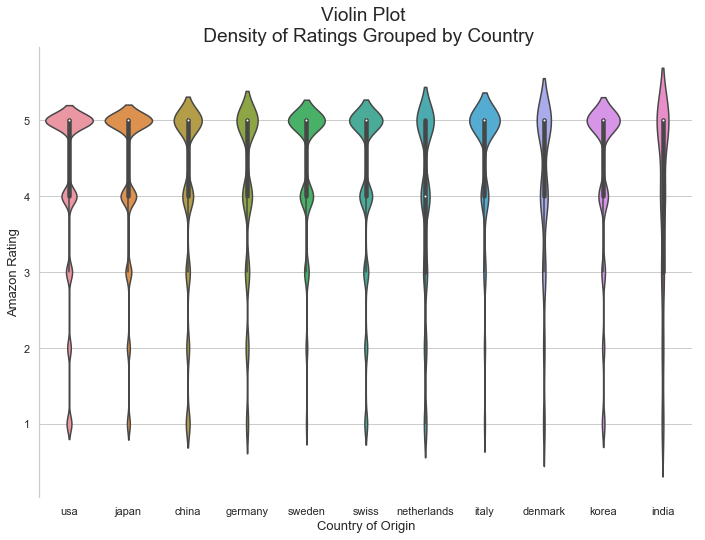

In [8]:
# Create Violin plot to visualize data using seaborn 

# It is interesting to note that average ratings seem to hover above 4.0 for all countires
# I ran an ANOVA on these data and it appears that ratings are statistically different for name brand/non name-brands
# However, the effect size is extremely small

sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="country_origin", y="overall", gridsize = 1000, data=fullData )   
sns.despine()

plt.title('Violin Plot \n Density of Ratings Grouped by Country', fontsize=19)
plt.xlabel('Country of Origin', fontsize=13)
plt.ylabel('Amazon Rating', fontsize=13)
sns.despine(left=False, bottom=True)


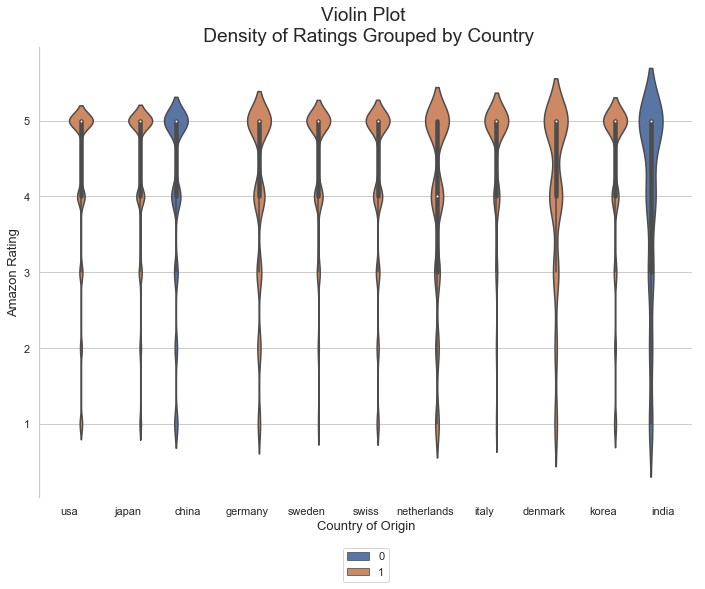

In [15]:
# Visualize density plot split by development level

sns.set(style="whitegrid")

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="country_origin", y="overall", gridsize = 1000, hue = 'developed', data=fullData)   
sns.despine()

plt.title('Violin Plot \n Density of Ratings Grouped by Country', fontsize=19)
plt.xlabel('Country of Origin', fontsize=13)
plt.ylabel('Amazon Rating', fontsize=13)

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

sns.despine(left=False, bottom=True)

The results suggest of my project (ANOVA not shown in this notebook, but visualizations support the findings) suggests that there was a significant difference between average overall ratings for developed nation brands versus developing nation brands as determined by a one-way ANOVA (F(1, 369175) = 465.99, p = 2.76e-103, ηp2 = 0.00126). However, given the magnitude of the data (i.e., 369,177 distinct data points) and the small p-value, an effect size analysis was performed to validate that the country-of-origin effect was not simply due to the size of the data, which naturally amplifies even miniscule differences between two groups. As such, the data were further subject to a partial eta-squared analysis to calculate the effect size of the data. The result of the partial eta-squared indicates that, even though the ANOVA suggests the overall ratings from developed and developing brands are statistically significant, the difference is trivial. As anything less than a 0.01 effect size is believed to be a trivial effect, the result of the partial eta-squared (ηp2 = 0.00126) suggests the quantity of data augmented inconsequential differences between the means. 